In [1]:
import pandas as pd
import numpy as np

Realizo a leitura dos registros dos alunos evadidos da Escola de Minas. Dados retirados da UFOP, link no final do prgrama.

In [2]:
diplomados_T = pd.read_csv('graduacao_diplomados.csv',sep=';', encoding='latin-1')
diplomados_1 = pd.read_csv('diplomados-2017-2.csv',sep=';', encoding='latin-1')
diplomados_2 = pd.read_csv('diplomados-2018-1.csv',sep=';', encoding='latin-1')
diplomados_3= pd.read_csv('diplomados-2018-2.csv',sep=';', encoding='latin-1')

In [3]:
#Unir os ultimos 3 periodos em um dataframe, todos tinham cabeçalho identico
diplomados_EM = pd.concat([diplomados_1, diplomados_2, diplomados_3], ignore_index=False, sort = False)

#Transformo a cabeçalho de todas as colunas em letra maiuscula e sem acento.
diplomados_T.columns = diplomados_T.columns.str.upper()
diplomados_EM.columns = diplomados_EM.columns.str.upper()
diplomados_EM = diplomados_EM.rename(columns={"UNIDADE ACADÊMICA": "UNIDADE_ACADEMICA"})
diplomados_EM = diplomados_EM.rename(columns={"DESCRIÇÃO HABILITAÇÃO": "HABILITACAO"})
diplomados_EM = diplomados_EM.rename(columns={"DESCRIÇÃO CURSO": "CURSO"})

#juntando o dataframe com todos os evadidos da EM
diplomados = pd.concat([diplomados_EM, diplomados_T], ignore_index=False, sort = False)

#selecionando a Escola de Minas
diplomados = diplomados.loc[diplomados['UNIDADE_ACADEMICA'] == 'ESCOLA DE MINAS']

In [4]:
diplomados.head()

,ANO,SEMESTRE,CAMPUS,UNIDADE_ACADEMICA,CURSO,HABILITACAO,FORMATO,DIPLOMADOS
2,2017,2,OURO PRETO,ESCOLA DE MINAS,ARQUITETURA E URBANISMO-ARQ,NaN,PRESENCIAL,28
14,2017,2,OURO PRETO,ESCOLA DE MINAS,ENGENHARIA AMBIENTAL-AMB,NaN,PRESENCIAL,13
15,2017,2,OURO PRETO,ESCOLA DE MINAS,ENGENHARIA CIVIL-CIV,NaN,PRESENCIAL,34
17,2017,2,OURO PRETO,ESCOLA DE MINAS,ENGENHARIA DE CONTROLE E AUTOMACAO-AUT,NaN,PRESENCIAL,21
18,2017,2,OURO PRETO,ESCOLA DE MINAS,ENGENHARIA DE MINAS-MIN,NaN,PRESENCIAL,21


In [5]:
evadidos_por_ano = diplomados.groupby(['ANO']).DIPLOMADOS.sum()
evadidos_por_ano.tail()

ANO
2014    365
2015    353
2016    465
2017    231
2018    422
Name: DIPLOMADOS, dtype: int64

In [6]:
#evadidos_por_ano
EM_total = pd.read_csv('emtotalordenado.csv',sep=';', encoding='latin-1')

#para agrupar pela data transformei os anos em variavel tipo data e somei os periodos.
EM_total['SemestreLetivo'] = pd.to_datetime(EM_total['SemestreLetivo'], format='%Y/%m')
EM_total
matriculados = EM_total.groupby(EM_total['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)
matriculados.head()

,TotalGeral
SemestreLetivo,
2003,2825
2004,2959
2005,3031
2006,3036
2007,3099


In [7]:
tabela = pd.DataFrame(evadidos_por_ano)
tabela['matriculados'] = matriculados['TotalGeral']
tabela = tabela.reset_index()

tabela['Taxa de Diplomados'] = (tabela['DIPLOMADOS']/tabela['matriculados'])
tabela = tabela.reset_index()

In [8]:
tabela

,index,ANO,DIPLOMADOS,matriculados,Taxa de Diplomados
0,0,2000,137,NaN,NaN
1,1,2001,119,NaN,NaN
2,2,2002,131,NaN,NaN
3,3,2003,162,2825.0,0.057345
4,4,2004,173,2959.0,0.058466
5,5,2005,228,3031.0,0.075223
6,6,2006,207,3036.0,0.068182
7,7,2007,239,3099.0,0.077122
8,8,2008,239,3158.0,0.075681
9,9,2009,258,3741.0,0.068966


In [57]:
agregador = tabela['matriculados'].loc[3:18]
agregador = pd.DataFrame(agregador)
agregador = agregador.reset_index()
agregador = agregador.rename(columns={"matriculados": "Matriculados ajustado"})
agregador['ANO'] = range(2008,2024)

tabela_ajustada = pd.merge(tabela, agregador, on='ANO', how='inner')

In [58]:
tabela_ajustada = tabela_ajustada.drop(columns= ['index_y', 'index_x'])
tabela_ajustada['(Diplomados*100)/Matriculados_ajustado'] = (tabela_ajustada['DIPLOMADOS']/tabela_ajustada['Matriculados ajustado'])*100
tabela_ajustada.tail()

,ANO,DIPLOMADOS,matriculados,Taxa de Diplomados,Matriculados ajustado,(Diplomados*100)/Matriculados_ajustado
6,2014,365,6200.0,0.058871,3741.0,9.756750
7,2015,353,6284.0,0.056174,4329.0,8.154308
8,2016,465,6358.0,0.073136,4932.0,9.428224
9,2017,231,6119.0,0.037751,5486.0,4.210718
10,2018,422,6173.0,0.068362,5957.0,7.084103


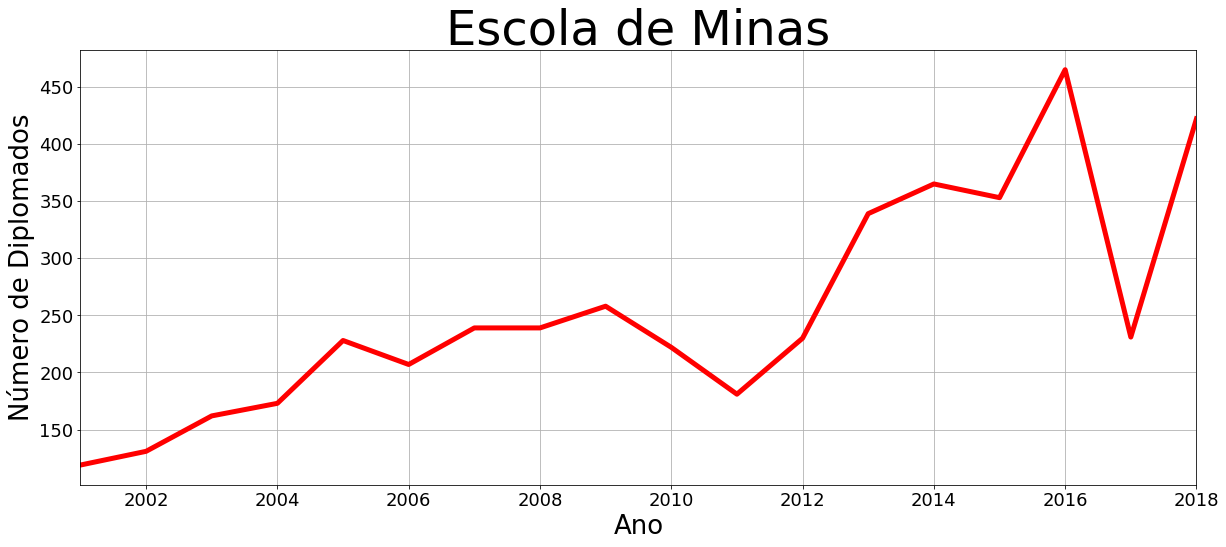

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(tabela.iloc[:,1].values, tabela.iloc[:,2].values,color = 'red',linewidth=5)

plt.ylabel('Número de Diplomados',size = 26)
plt.xlabel('Ano',size = 26)

plt.xlim([2001.0,2018.0])

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.title('Escola de Minas', size = 48)

plt.grid(True)
plt.show()

In [11]:
tabela

,index,ANO,DIPLOMADOS,matriculados,Taxa de Diplomados
0,0,2000,137,NaN,NaN
1,1,2001,119,NaN,NaN
2,2,2002,131,NaN,NaN
3,3,2003,162,2825.0,0.057345
4,4,2004,173,2959.0,0.058466
5,5,2005,228,3031.0,0.075223
6,6,2006,207,3036.0,0.068182
7,7,2007,239,3099.0,0.077122
8,8,2008,239,3158.0,0.075681
9,9,2009,258,3741.0,0.068966


In [60]:
    diplomados_pro.tail()

,ANO,CURSO,Diplomados,TotalGeral,Diplomados a cada 100 alunos
80,2014,ENGENHARIA DE PRODUCAO-PRO,46,729,6.31
89,2015,ENGENHARIA DE PRODUCAO-PRO,37,762,4.86
98,2016,ENGENHARIA DE PRODUCAO-PRO,59,757,7.79
107,2017,ENGENHARIA DE PRODUCAO-PRO,35,713,4.91
116,2018,ENGENHARIA DE PRODUCAO-PRO,51,712,7.16


In [61]:
diplomados_pro.tail()

,ANO,CURSO,Diplomados,TotalGeral,Diplomados a cada 100 alunos
80,2014,ENGENHARIA DE PRODUCAO-PRO,46,729,6.31
89,2015,ENGENHARIA DE PRODUCAO-PRO,37,762,4.86
98,2016,ENGENHARIA DE PRODUCAO-PRO,59,757,7.79
107,2017,ENGENHARIA DE PRODUCAO-PRO,35,713,4.91
116,2018,ENGENHARIA DE PRODUCAO-PRO,51,712,7.16


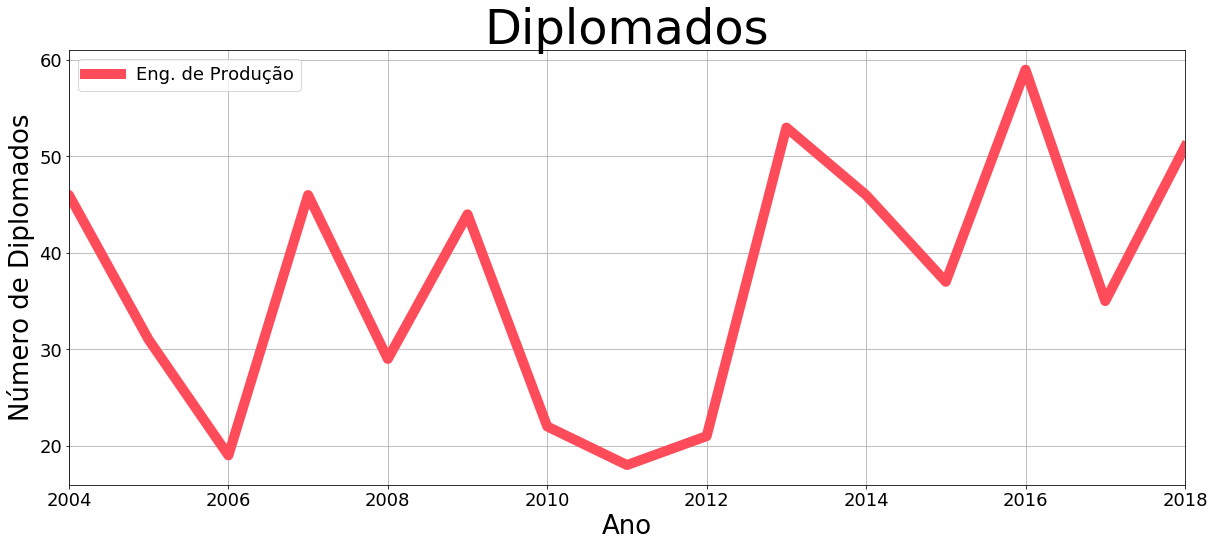

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(diplomados_pro.iloc[:,0].values, diplomados_pro.iloc[:,2].values, label = 'Eng. de Produção',color = '#FF4C5B',linewidth=10)
#plt.plot(diplomados_cat.iloc[:,0].values, diplomados_cat.iloc[:,2].values, label = 'Eng. Controle e Automação',color = 'gray',linewidth=5)
#plt.plot(diplomados_met.iloc[:,0].values, diplomados_met.iloc[:,2].values, label = 'Eng. Metalúrgica',color = 'red',linewidth=5)

plt.ylabel('Número de Diplomados',size = 26)
plt.xlabel('Ano',size = 26)

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlim([2004.0,2018.0])

plt.title('Diplomados', size = 48)
plt.legend(loc = ('best'),fontsize=18)
plt.grid(True)
plt.show()

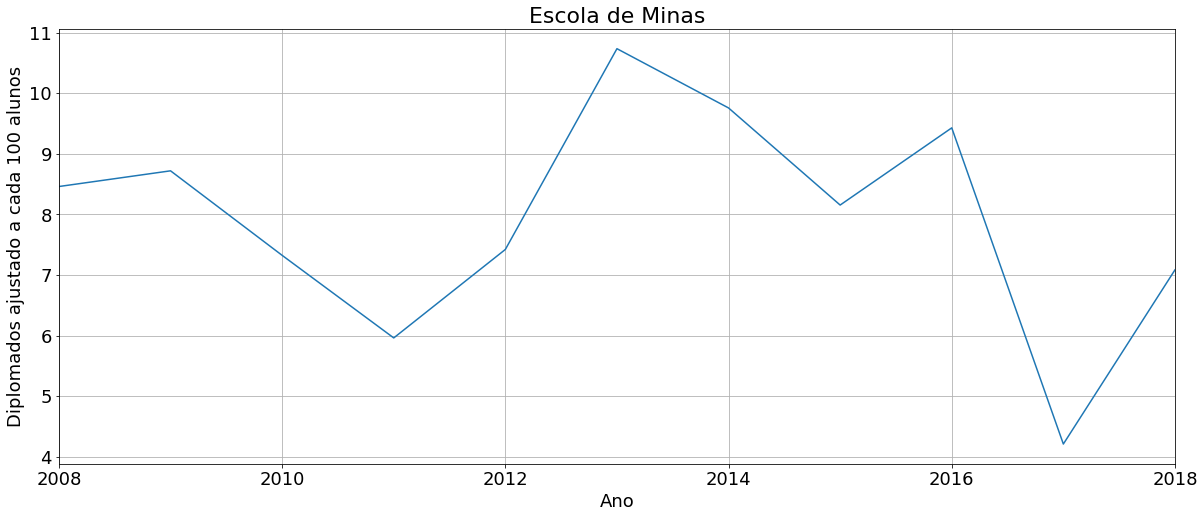

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(tabela_ajustada.iloc[:,0].values, tabela_ajustada.iloc[:,5].values)

plt.ylabel('Diplomados ajustado a cada 100 alunos',size = 18)
plt.xlabel('Ano',size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlim([2008.0,2018.0])

plt.title('Escola de Minas', size = 22)

plt.grid(True)
plt.show()

Conclusão:

Apartir dos dados de diplomados e evadidos, observamos que não aumentamos a nossa produtividade na quantidade de formados.

A caso não ocorra mudanças deve-se esperar uma estabilização no numero de diplomados apartir de 2018.

In [31]:
diplomados_por_ano_curso = diplomados.groupby(['ANO','CURSO']).DIPLOMADOS.sum().to_frame(name = 'Diplomados').reset_index()

In [32]:
matriculados2 = EM_total.groupby([EM_total['SemestreLetivo'].dt.year,'Curso']).TotalGeral.sum()
matriculados2 = pd.DataFrame(matriculados2).reset_index()

tabela2 = pd.DataFrame(diplomados_por_ano_curso)
tabela2 = tabela2.merge(matriculados2, left_on=['ANO','CURSO'], right_on= ['SemestreLetivo','Curso'])

tabela2 = tabela2.drop(columns= ['SemestreLetivo'])
tabela2 = tabela2.drop(columns= ['Curso'])

tabela2['Diplomados a cada 100 alunos'] = round((tabela2['Diplomados']/tabela2['TotalGeral'])*100,2)

tabela2.tail()

,ANO,CURSO,Diplomados,TotalGeral,Diplomados a cada 100 alunos
115,2018,ENGENHARIA DE MINAS-MIN,59,741,7.96
116,2018,ENGENHARIA DE PRODUCAO-PRO,51,712,7.16
117,2018,ENGENHARIA GEOLOGICA-GEO,42,742,5.66
118,2018,ENGENHARIA MECANICA-MEC,55,719,7.65
119,2018,ENGENHARIA METALURGICA-MET,38,628,6.05


In [33]:
#Separando os cursos e selecionando os matriculados e diplomados
EM_total_2 = EM_total
EM_total_2['SemestreLetivo'] = EM_total['SemestreLetivo'].dt.year
EM_total_2

,SemestreLetivo,Formato,Curso,TotalGeral
0,2008,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,36
1,2009,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,68
2,2009,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,105
3,2010,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,145
4,2010,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,177
5,2011,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,209
6,2011,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,236
7,2012,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,272
8,2012,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,309
9,2013,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,339


In [34]:
#seleção dos bancos de dados de evasão por curso.
diplomados_amb = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA AMBIENTAL-AMB']
diplomados_arq = tabela2.loc[tabela2['CURSO'] == 'ARQUITETURA E URBANISMO-ARQ']
diplomados_civ = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA CIVIL-CIV']
diplomados_cat = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA DE CONTROLE E AUTOMACAO-AUT']
diplomados_minas = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA DE MINAS-MIN']
diplomados_pro = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA DE PRODUCAO-PRO']
diplomados_geo = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA GEOLOGICA-GEO']
diplomados_mec = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA MECANICA-MEC']
diplomados_met = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA METALURGICA-MET']
diplomados_urb = tabela2.loc[tabela2['CURSO'] == 'ENGENHARIA URBANA-URB']

In [35]:
diplomados_pro

,ANO,CURSO,Diplomados,TotalGeral,Diplomados a cada 100 alunos
2,2003,ENGENHARIA DE PRODUCAO-PRO,45,456,9.87
7,2004,ENGENHARIA DE PRODUCAO-PRO,46,430,10.70
14,2005,ENGENHARIA DE PRODUCAO-PRO,31,425,7.29
21,2006,ENGENHARIA DE PRODUCAO-PRO,19,424,4.48
28,2007,ENGENHARIA DE PRODUCAO-PRO,46,408,11.27
35,2008,ENGENHARIA DE PRODUCAO-PRO,29,387,7.49
42,2009,ENGENHARIA DE PRODUCAO-PRO,44,455,9.67
49,2010,ENGENHARIA DE PRODUCAO-PRO,22,494,4.45
56,2011,ENGENHARIA DE PRODUCAO-PRO,18,584,3.08
63,2012,ENGENHARIA DE PRODUCAO-PRO,21,677,3.10


In [36]:
agregador2 = diplomados_pro['TotalGeral'].loc[0:12]
agregador2 = agregador2.reset_index()
agregador2 = agregador2.rename(columns={"matriculados": "Matriculados ajustado"})
agregador2['ANO'] = range(2008,2024)

tabela2_ajustada = pd.merge(diplomados_pro, agregador2, on='ANO', how='inner')

ValueError: Length of values does not match length of index

In [23]:
agregador2

,index,TotalGeral
0,2,456
1,7,430


In [24]:
tabela2_ajustada = tabela2_ajustada.drop(columns= ['index'])
tabela2_ajustada['(Diplomados*100)/Matriculados_ajustado'] = (tabela2_ajustada['DIPLOMADOS']/tabela2_ajustada['Matriculados ajustado'])*100
tabela2_ajustada.tail()

NameError: name 'tabela2_ajustada' is not defined

In [25]:
diplomados_pro

,ANO,CURSO,Diplomados,TotalGeral,Diplomados a cada 100 alunos
2,2003,ENGENHARIA DE PRODUCAO-PRO,45,456,9.87
7,2004,ENGENHARIA DE PRODUCAO-PRO,46,430,10.70
14,2005,ENGENHARIA DE PRODUCAO-PRO,31,425,7.29
21,2006,ENGENHARIA DE PRODUCAO-PRO,19,424,4.48
28,2007,ENGENHARIA DE PRODUCAO-PRO,46,408,11.27
35,2008,ENGENHARIA DE PRODUCAO-PRO,29,387,7.49
42,2009,ENGENHARIA DE PRODUCAO-PRO,44,455,9.67
49,2010,ENGENHARIA DE PRODUCAO-PRO,22,494,4.45
56,2011,ENGENHARIA DE PRODUCAO-PRO,18,584,3.08
63,2012,ENGENHARIA DE PRODUCAO-PRO,21,677,3.10


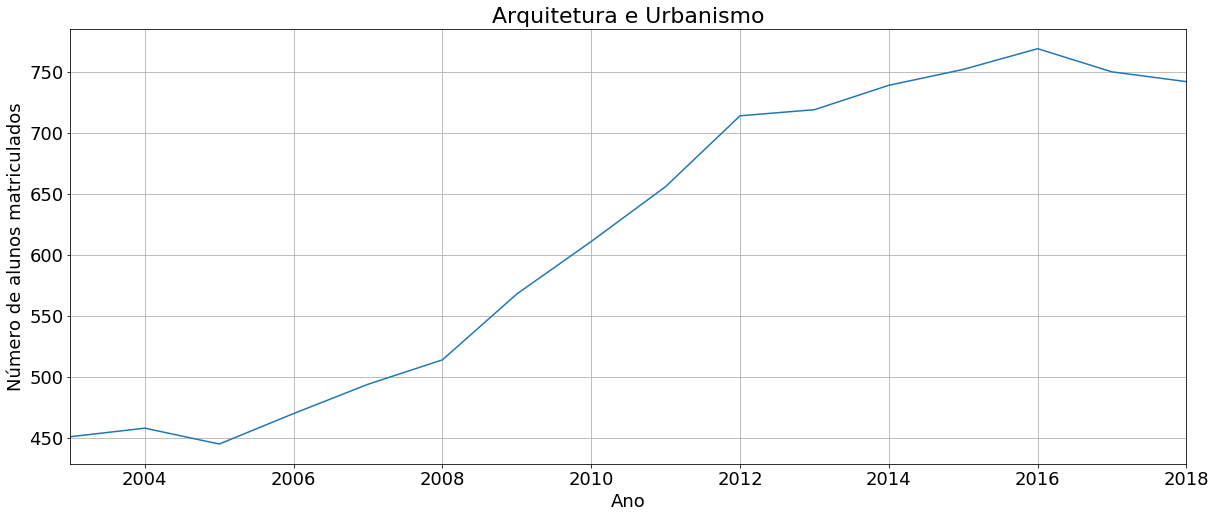

In [222]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(diplomados_geo.iloc[:,1].values, diplomados_geo.iloc[:,4].values)

plt.ylabel('Número de alunos matriculados',size = 18)
plt.xlabel('Ano',size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlim([2003.0,2018.0])
#plt.ylim([715,750])

plt.title('Engenharia Geológica', size = 22)

plt.grid(True)
plt.show()

## import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(diplomados_geo.iloc[:,1].values, diplomados_geo.iloc[:,3].values)

plt.ylabel('Número de Diplomados',size = 18)
plt.xlabel('Ano',size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlim([2003.0,2018.0])

plt.title('Engenharia Geológica', size = 22)

plt.grid(True)
plt.show()

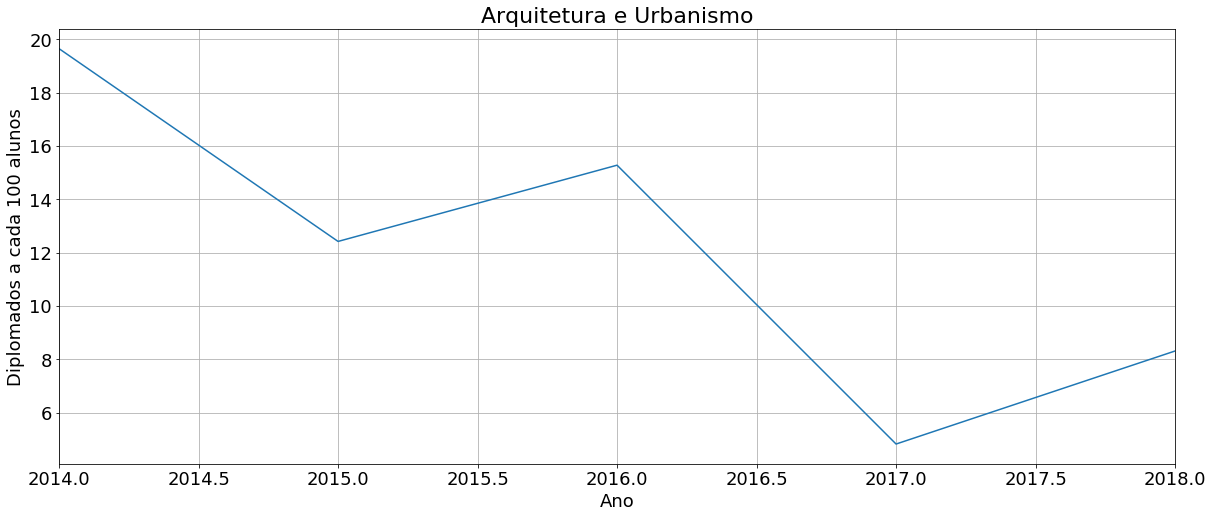

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.plot(diplomados_arq.iloc[:,1].values, diplomados_arq.iloc[:,7].values)

plt.ylabel('Diplomados a cada 100 alunos',size = 18)
plt.xlabel('Ano',size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)

plt.xlim([2014.0,2018.0])

plt.title('Arquitetura e Urbanismo', size = 22)

plt.grid(True)
plt.show()